# EDA: Exploratory Data Analysis

## Analisis inicial:

1.- Carga de los datos

2.- Inspeccion inicial: calidad de datos pre EDA -> info(), isnull(), duplicated(), describe(), dtypes como algunos ejemplos.

3.- Identificacion de los problemas

### 1.- Carga de los datos

In [1]:
import kagglehub
import pandas as pd
import os

# Descargar y cargar el dataset
path = kagglehub.dataset_download("gregorut/videogamesales")
df = pd.read_csv(os.path.join(path, 'vgsales.csv'))

### 2.- Inspeccion inicial

In [2]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [10]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


## EDA: Tecnicas claves

1.- Analisis Univariado: histogramas, boxplots, media, mediana y moda

2.- Analisis Bivariado: scatter plots, correlacion de Pearson y crosstab

3.- Analisis Multivariado: matrices de correlacion, pair plots y regresion multiple

4.- Visualizaciones: histogramas, dispersion, barras, mapas de calor

### Analisis univariado

In [16]:
print('Media: ', df['NA_Sales'].mean())
print('Mediana: ', df['NA_Sales'].median())
print('Desviacion estandar: ', df['NA_Sales'].std())
print('Moda: ',df['NA_Sales'].mode())

Media:  0.26466742981082064
Mediana:  0.08
Desviacion estandar:  0.8166830292990428
Moda:  0    0.0
Name: NA_Sales, dtype: float64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

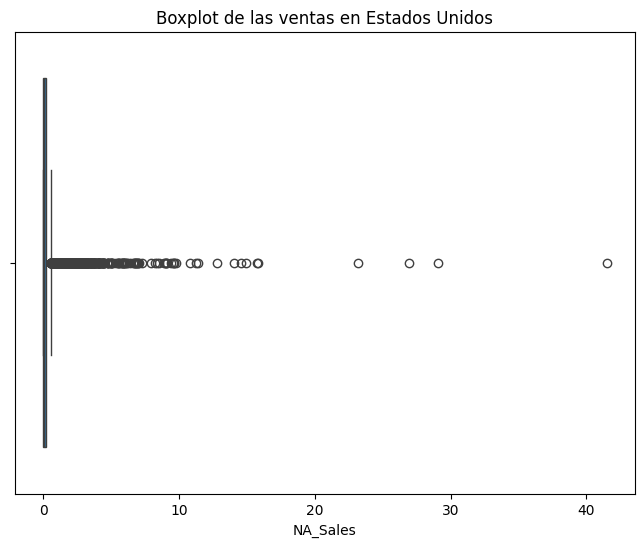

In [18]:
plt.figure(figsize = (8, 6))
sns.boxplot(x = df['NA_Sales'])
plt.title('Boxplot de las ventas en Estados Unidos')
plt.show()

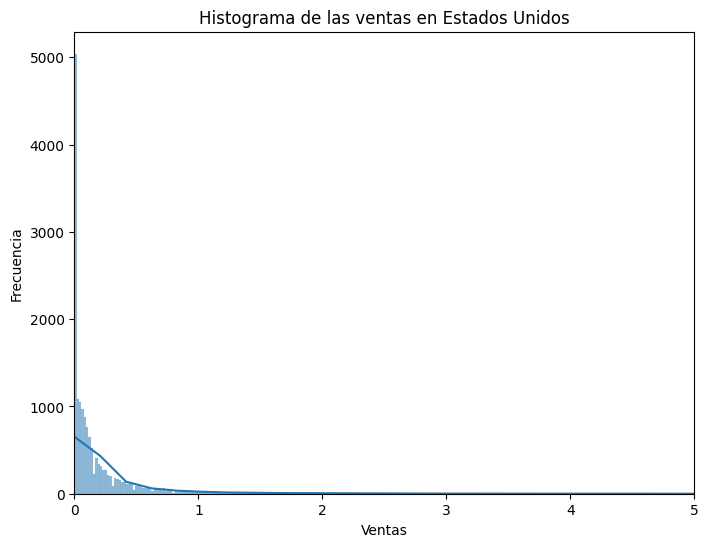

In [30]:
plt.figure(figsize = (8, 6))
sns.histplot(x = df['NA_Sales'], bins = 'auto', kde = True)
plt.title('Histograma de las ventas en Estados Unidos')
plt.xlim(0, 5)
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

###